In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import glob
import os
from sklearn.preprocessing import MinMaxScaler

In [44]:
file_path_price =r'C:\Users\Leo Hubmann\Desktop\thesis\data\price_data\bitcoin_2021_2024.csv'

df_price = pd.read_csv(file_path_price, low_memory=False)

VADER Sentiment

In [45]:
# load price data
df_price = pd.read_csv(r'C:\Users\Leo Hubmann\Desktop\thesis\data\price_data\bitcoin_2021_2024.csv', parse_dates=['date'])
df_price = df_price[df_price['date'] >= '2021-01-01']
df_price['daily_return_pct'] = df_price['close'].pct_change() * 100

In [75]:
# calculate daily returns explicitly
df_price['daily_return'] = df_price['close'].pct_change()

In [47]:
# load VADER sentiment data

df_vader = pd.read_csv(r'C:\Users\Leo Hubmann\Desktop\BachelorThesis_data\all_daily_vader_sentiment_v2.csv', parse_dates=['date'])

In [48]:
df_vader['sentiment_pct'] = (df_vader['daily_vader_sentiment'] - df_vader['daily_vader_sentiment'].min()) / \
                            (df_vader['daily_vader_sentiment'].max() - df_vader['daily_vader_sentiment'].min()) * 100


In [49]:
df_merged = pd.merge(df_price[['date', 'daily_return_pct']], df_vader[['date', 'sentiment_pct']], on='date', how='inner').dropna()

In [8]:
# scale sentiment explicitly to [-1, 1]
vmin, vmax = df_vader['daily_vader_sentiment'].min(), df_vader['daily_vader_sentiment'].max()
df_vader['vader_scaled'] = 2 * (df_vader['daily_vader_sentiment'] - vmin) / (vmax - vmin) - 1

In [9]:
# merge dataframes explicitly on 'date'
df_merged = pd.merge(df_price[['date', 'daily_return']], df_vader[['date', 'vader_scaled']], on='date', how='inner').dropna()

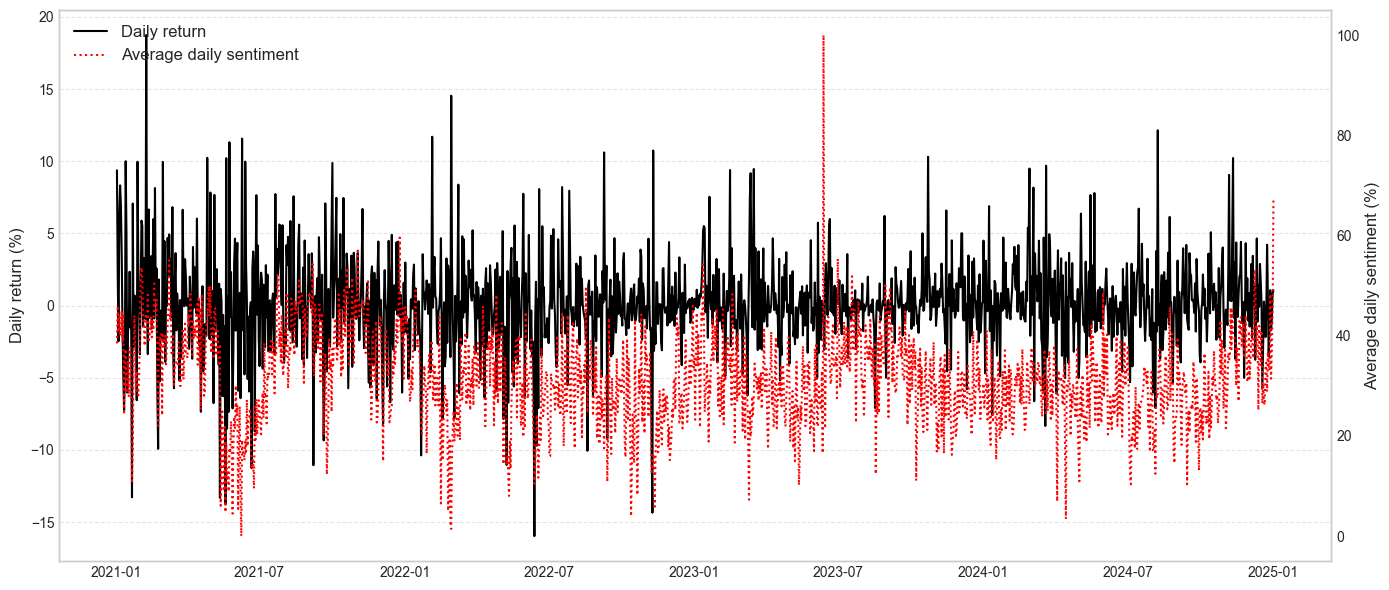

In [80]:
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot daily returns (%)
ax1.plot(df_merged['date'], df_merged['daily_return_pct'],
         color='black', linewidth=1.5, label='Daily return')
ax1.set_ylabel('Daily return (%)', fontsize=12)

# Plot sentiment explicitly on secondary axis
ax2 = ax1.twinx()
ax2.plot(df_merged['date'], df_merged['sentiment_pct'],
         color='red', linestyle=':', linewidth=1.5, label='Average daily sentiment')
ax2.set_ylabel('Average daily sentiment (%)', fontsize=12)

# Explicit grid style: horizontal only, no vertical
ax1.grid(axis='y', linestyle='--', alpha=0.5)
ax1.grid(axis='x', visible=False)
ax2.grid(False)

# Clearly combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=12)

fig.tight_layout()
plt.show()

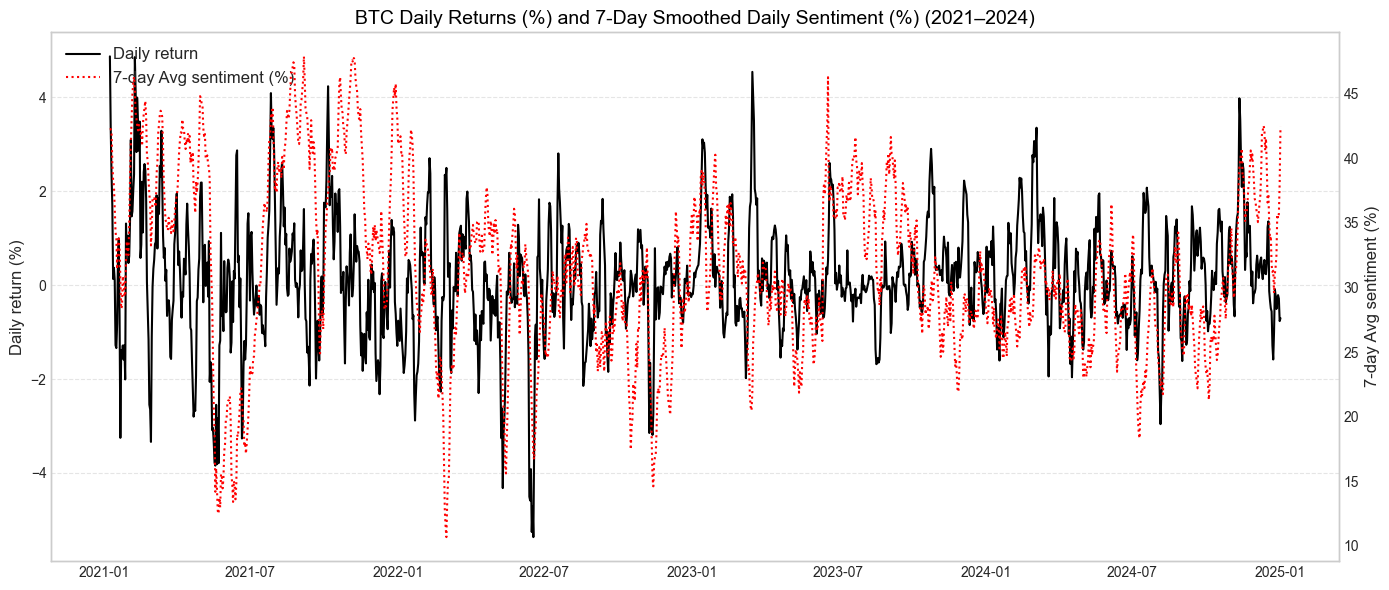

In [87]:
df_vader['sentiment_smoothed'] = df_vader['sentiment_pct'].rolling(window=7).mean()
df_price['return_smoothed'] = df_price['daily_return_pct'].rolling(window=7).mean()

# Explicit merge
df_merged = pd.merge(df_price[['date', 'return_smoothed']],
                     df_vader[['date', 'sentiment_smoothed']], on='date').dropna()

# Plot explicitly
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax1 = plt.subplots(figsize=(14, 6))

# Daily returns (explicitly black)
ax1.plot(df_merged['date'], df_merged['return_smoothed'], color='black', linewidth=1.5, label='Daily return')
ax1.set_ylabel('Daily return (%)', fontsize=12)

# Smoothed sentiment (explicitly red dotted line)
ax2 = ax1.twinx()
ax2.plot(df_merged['date'], df_merged['sentiment_smoothed'], color='red', linestyle=':', linewidth=1.5, label='7-day Avg sentiment (%)')
ax2.set_ylabel('7-day Avg sentiment (%)', fontsize=12)

# Explicitly adjust grid lines
ax1.grid(axis='y', linestyle='--', alpha=0.5)
ax1.grid(axis='x', visible=False)
ax2.grid(False)

# Explicit combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=12)

# Title explicitly defined
plt.title('BTC Daily Returns (%) and 7-Day Smoothed Daily Sentiment (%) (2021–2024)', fontsize=14)

fig.tight_layout()
plt.show()